# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction
### Notebook 6: Word and Sentence Embedding with FastText and Pre-trained Bert

Authors: Muhammed K. Ç., Karsanth P., Andrea V.


In [ ]:
# Installing necessary libraries
!pip install scikit-learn
#!pip install fasttext
!pip install --upgrade scikit-learn
!pip install --upgrade tensorflow
!pip install scipy
!pip install seaborn
!pip install gensim
!pip install lime
!pip install bertopic
!pip install torch
!pip install transformers
!pip install adjustText

In [ ]:
# Import necessary libraries
# import warnings
# warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt
import random
import torch
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import string
from gensim.models import FastText
from gensim.utils import simple_preprocess
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from adjustText import adjust_text
from transformers import BertTokenizer, BertModel


In [ ]:
# Default Style Settings
matplotlib.rcParams['figure.dpi'] = 300
pd.options.display.max_colwidth = 200

# Loading, Cleaning Preprocessing

In [ ]:
#Read csv file
file_path = Path("/cleantech_media_dataset_v1_20231109.csv") 

df= pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainabi...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of Gujarat to the grid on Jan. 10, making it the first of India's 700 megawatt indigenously developed pr...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this week with the US-China relationship at its worst in decades. Energy has come to play a bigger role in that relationship than ever before, and rising C...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the government's fifth Basic Energy Plan to lift nuclear's power share to 20% -22% by fiscal 2030, a target whic...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in shares of fossil fuel companies, a move aimed at insulating its holdings from the potential impacts of cl...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000


In [ ]:
# Get column names
df.columns

Index(['Unnamed: 0', 'title', 'date', 'author', 'content', 'domain', 'url'], dtype='object')

In [ ]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', "date", "url", "author"], inplace=True)

In [ ]:
# Check dimension
df.shape

(9607, 3)

In [ ]:
# Droppping the duplicates
df.drop_duplicates(subset = "title", keep = "last", inplace = True)

In [ ]:
# Check if droppping worked correctly
df.shape

(9583, 3)

In [ ]:
# Downloads
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Create a WordPunctTokenizer object from the nltk library
wpt = nltk.WordPunctTokenizer()

# Get a list of English stopwords from the nltk corpus
stop_words = nltk.corpus.stopwords.words('english')

# Define a function to preprocess and tokenize a document
def preprocess_document(doc):
    # Remove special characters, except whitespaces, from the document using regular expressions
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)

    # Convert the document to lowercase
    doc = doc.lower()

    # Remove leading and trailing whitespaces
    doc = doc.strip()

    # Tokenize the document using the WordPunctTokenizer
    tokens = wpt.tokenize(doc)

    # Filter out stopwords from the list of tokens
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Recreate the document by joining the filtered tokens with whitespaces
    doc = ' '.join(filtered_tokens)

    # Return the preprocessed document
    return doc


In [ ]:
# Add a new column "Clean Content" to the DataFrame df and assign the result of applying the preprocess_document function to the "content" column
df["Clean Content"] = df["content"].apply(preprocess_document)

In [ ]:
# Add a new column "Clean Title" to the DataFrame df and assign the result of applying the preprocess_document function to the "title" column
df["Clean Title"] = df["title"].apply(preprocess_document)


In [ ]:
# Get first rows
df.head()

,title,content,domain,Clean Content,Clean Title
0,Qatar to Slash Emissions as LNG Expansion Advances,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainabi...",energyintel,qatar petroleum qp targeting aggressive cuts greenhouse gas emissions prepares launch phase planned million ton per year lng expansion latest sustainability report published wednesday qp said goal...,qatar slash emissions lng expansion advances
1,India Launches Its First 700 MW PHWR,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of Gujarat to the grid on Jan. 10, making it the first of India's 700 megawatt indigenously developed pr...",energyintel,nuclear power corp india ltd npcil synchronized kakrapar western state gujarat grid jan making first indias megawatt indigenously developed pressurized heavy water reactors phwrs reach milestone n...,india launches first mw phwr
2,New Chapter for US-China Energy Trade,"[""New US President Joe Biden took office this week with the US-China relationship at its worst in decades. Energy has come to play a bigger role in that relationship than ever before, and rising C...",energyintel,new us president joe biden took office week uschina relationship worst decades energy come play bigger role relationship ever rising chinese imports us oil lng could serve foundation fresh discuss...,new chapter uschina energy trade
3,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the government's fifth Basic Energy Plan to lift nuclear's power share to 20% -22% by fiscal 2030, a target whic...",energyintel,slow pace japanese reactor restarts continues cast doubt goal governments fifth basic energy plan lift nuclears power share fiscal target tokyobased institute energy economics japan says require o...,japan slow restarts cast doubt energy plan
4,NYC Pension Funds to Divest Fossil Fuel Shares,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in shares of fossil fuel companies, a move aimed at insulating its holdings from the potential impacts of cl...",energyintel,two new york citys largest pension funds say divest roughly billion shares fossil fuel companies move aimed insulating holdings potential impacts climate change move makes good funds january decis...,nyc pension funds divest fossil fuel shares


# Custom Embedding

In [ ]:
# Function to create custom word embeddings
def custom_word_embedding(text):
    # Split the input text into individual words
    words = text.split()

    # List to store word embeddings for each word in the text
    word_embeddings = []

    # Iterate through each word in the text
    for word in words:
        # Using random embeddings instead of pretrained embeddings
        word_embedding = torch.rand(100).numpy()

        # Append the generated word embedding to the list
        word_embeddings.append(word_embedding)

    # Check if there are any word embeddings generated
    if word_embeddings:
        # Calculate the average word embedding by summing and dividing by the number of embeddings
        return sum(word_embeddings) / len(word_embeddings)
    else:
        # Return None if no word embeddings were generated (empty input text)
        return None



In [ ]:
# Add a new column "Word Embedding Custom Content" to the DataFrame df
# Assign the result of applying the custom_word_embedding function to the "Clean Content" column
df["Word Embedding Custom Content"] = df["Clean Content"].apply(custom_word_embedding)


In [ ]:
# Add a new column "Word Embedding Custom Title" to the DataFrame df
# Assign the result of applying the custom_word_embedding function to the "Clean Title" column
df["Word Embedding Custom Title"] = df["Clean Title"].apply(custom_word_embedding)


In [ ]:
# Get first rows
df.head()

,title,content,domain,Clean Content,Clean Title,Word Embedding Custom Content,Word Embedding Custom Title
0,Qatar to Slash Emissions as LNG Expansion Advances,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainabi...",energyintel,qatar petroleum qp targeting aggressive cuts greenhouse gas emissions prepares launch phase planned million ton per year lng expansion latest sustainability report published wednesday qp said goal...,qatar slash emissions lng expansion advances,"[0.5277138, 0.4710056, 0.50198895, 0.49841255, 0.51772135, 0.4801202, 0.50185883, 0.5204972, 0.49088502, 0.47948658, 0.47823378, 0.51389104, 0.48769084, 0.52560645, 0.50924444, 0.47147626, 0.50834...","[0.44641483, 0.37182698, 0.47159252, 0.5063311, 0.5062742, 0.29510346, 0.6472077, 0.4603684, 0.509196, 0.746897, 0.54930395, 0.41389427, 0.43695784, 0.25679943, 0.43132854, 0.6675477, 0.37241063, ..."
1,India Launches Its First 700 MW PHWR,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of Gujarat to the grid on Jan. 10, making it the first of India's 700 megawatt indigenously developed pr...",energyintel,nuclear power corp india ltd npcil synchronized kakrapar western state gujarat grid jan making first indias megawatt indigenously developed pressurized heavy water reactors phwrs reach milestone n...,india launches first mw phwr,"[0.4918967, 0.48456827, 0.53057164, 0.49153063, 0.5296737, 0.47762954, 0.49424008, 0.5294304, 0.5013063, 0.50577813, 0.5061148, 0.5185936, 0.49934614, 0.49463508, 0.48287216, 0.48893827, 0.4805900...","[0.35826007, 0.8173541, 0.6536454, 0.39071816, 0.5850378, 0.5144739, 0.32704115, 0.50454295, 0.46328622, 0.42994094, 0.3668498, 0.69790554, 0.3786895, 0.50142187, 0.34221128, 0.53289187, 0.2797888..."
2,New Chapter for US-China Energy Trade,"[""New US President Joe Biden took office this week with the US-China relationship at its worst in decades. Energy has come to play a bigger role in that relationship than ever before, and rising C...",energyintel,new us president joe biden took office week uschina relationship worst decades energy come play bigger role relationship ever rising chinese imports us oil lng could serve foundation fresh discuss...,new chapter uschina energy trade,"[0.49256253, 0.5105043, 0.5015235, 0.4918892, 0.5037311, 0.4734839, 0.51712173, 0.51546717, 0.513912, 0.50177544, 0.53451717, 0.50188977, 0.48614052, 0.48440832, 0.48406082, 0.49687958, 0.48736984...","[0.5080734, 0.48596317, 0.34961367, 0.6429579, 0.4573903, 0.44873095, 0.49494696, 0.58092725, 0.56093127, 0.42453688, 0.46844158, 0.0746928, 0.38679844, 0.47200307, 0.6099112, 0.46415296, 0.518180..."
3,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the government's fifth Basic Energy Plan to lift nuclear's power share to 20% -22% by fiscal 2030, a target whic...",energyintel,slow pace japanese reactor restarts continues cast doubt goal governments fifth basic energy plan lift nuclears power share fiscal target tokyobased institute energy economics japan says require o...,japan slow restarts cast doubt energy plan,"[0.48766744, 0.5280799, 0.4946005, 0.49553457, 0.5070873, 0.5143453, 0.50842506, 0.50151086, 0.48376894, 0.47924495, 0.49901813, 0.50218785, 0.49310657, 0.50892335, 0.49307206, 0.5203674, 0.475943...","[0.48125154, 0.37078333, 0.5197946, 0.5725691, 0.65940654, 0.34236136, 0.33114788, 0.5384902, 0.50871336, 0.582051, 0.4859384, 0.5276533, 0.5436742, 0.4502848, 0.50183654, 0.19364415, 0.44845194, ..."
4,NYC Pension Funds to Divest Fossil Fuel Shares,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in shares of fossil fuel companies, a move aimed at insulating its holdings from the potential impacts of cl...",energyintel,two new york citys

In [ ]:
# Function to calculate cosine similarity between two vectors
def cosine_similarity_score(vector1, vector2):
    # Check if both vectors are not None
    if vector1 is not None and vector2 is not None:
        # Use the cosine_similarity function to calculate the cosine similarity between the two vectors
        return cosine_similarity([vector1], [vector2])[0][0]
    else:
        # Return None if either vector1 or vector2 is None
        return None


In [ ]:
# Access the "Word Embedding Custom Content" value at the first row (index 0) of the DataFrame df
# This retrieves the custom word embedding for the content of the first data entry
df["Word Embedding Custom Content"][0]


array([0.5277138 , 0.4710056 , 0.50198895, 0.49841255, 0.51772135,
       0.4801202 , 0.50185883, 0.5204972 , 0.49088502, 0.47948658,
       0.47823378, 0.51389104, 0.48769084, 0.52560645, 0.50924444,
       0.47147626, 0.5083418 , 0.4855305 , 0.47887728, 0.49064675,
       0.5123794 , 0.4982088 , 0.5039649 , 0.49173737, 0.4955401 ,
       0.4731737 , 0.5031935 , 0.5125394 , 0.50706404, 0.49368444,
       0.5106751 , 0.4929557 , 0.50940543, 0.5049856 , 0.4710595 ,
       0.49500912, 0.48575872, 0.49083018, 0.49228066, 0.49072158,
       0.48857188, 0.47788444, 0.50272316, 0.47743392, 0.49709952,
       0.52103335, 0.47128573, 0.5187406 , 0.4866914 , 0.4928035 ,
       0.4724585 , 0.45558143, 0.5030904 , 0.49281073, 0.49868438,
       0.5124346 , 0.4817821 , 0.52718955, 0.4876994 , 0.4983978 ,
       0.49813452, 0.5159227 , 0.51492614, 0.48860452, 0.5415148 ,
       0.52038586, 0.4847829 , 0.5088871 , 0.51701635, 0.5310752 ,
       0.5222653 , 0.4758984 , 0.50232244, 0.4920651 , 0.47800

In [ ]:
# Calculate cosine similarity between "Clean Text" and "Title"
df["Cosine_Similarity_Custom"] = df.apply(lambda row: cosine_similarity_score(row["Word Embedding Custom Content"], row["Word Embedding Custom Title"]), axis=1)

## Model Evaluation

In [ ]:
# Calculate the mean of the "Cosine_Similarity_Custom" column in the DataFrame df
# This computes the average cosine similarity score across all entries in the specified column
df["Cosine_Similarity_Custom"].mean()


0.9765309

Very good score :-)

The result of 0.9765309 in the context of cosine similarity for word embeddings suggests a high degree of similarity between the vectors being compared. In the context of word embeddings, each sentence or piece of text is represented as a vector in a high-dimensional space, and cosine similarity measures the cosine of the angle between these vectors. A cosine similarity score of 1 indicates identical vectors, while a score of 0 indicates vectors that are orthogonal (no similarity), and a score of -1 indicates completely opposite vectors.

# Customized Embedding With FastText

In [ ]:
#Read csv file
file_path = Path("/content/drive/MyDrive/Colab Notebooks/cleantech_media_dataset_v1_20231109.csv") # Muhammed path
#file_path = Path("/content/drive/My Drive/CLT_Colab Notebooks/Project_Notebooks/cleantech_media_dataset_v1_20231109.csv") #Andrea Path
#file_path = Path("/content/drive/My Drive/cleantech_media_dataset_v1_20231109.csv") #Karsanth Path

df= pd.read_csv(file_path)

In [ ]:
# Remove specified columns ['Unnamed: 0', 'date', 'url', 'author'] from the DataFrame df
# The inplace=True parameter ensures the changes are applied directly to the original DataFrame

df.drop(columns=['Unnamed: 0', 'date', 'url', 'author'], inplace=True)

# Remove duplicate entries based on the "title" column, keeping the last occurrence
# The inplace=True parameter ensures the changes are applied directly to the original DataFrame

df.drop_duplicates(subset="title", keep="last", inplace=True)


In [ ]:
# Load spaCy model for sentence tokenization, lemmatization, and stopword removal
nlp = spacy.load("en_core_web_sm")


In [ ]:
# Function to preprocess text using spaCy
def preprocess_text(text):
    # Lemmatize and remove stop words using spaCy
    processed_tokens = [token.lemma_ for token in nlp(text) if not token.is_stop]

    # Remove punctuation from the processed tokens
    processed_tokens = [token for token in processed_tokens if token not in string.punctuation]

    # Return the preprocessed tokens
    return processed_tokens


In [ ]:
# Tokenize, lemmatize, and remove stopwords from the documents using the function
df["tokenized_sentences"] = [preprocess_text(doc) for doc in df["content"]]

In [ ]:
# Get first 5 rows
df.head()

,title,content,domain,tokenized_sentences
0,Qatar to Slash Emissions as LNG Expansion Advances,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainabi...",energyintel,"[Qatar, Petroleum, QP, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, Phase, 2, plan, 48, million, ton, year, LNG, expansion, late, Sustainability, Report, publish, Wednesday..."
1,India Launches Its First 700 MW PHWR,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of Gujarat to the grid on Jan. 10, making it the first of India's 700 megawatt indigenously developed pr...",energyintel,"[•, Nuclear, Power, Corp., India, Ltd., NPCIL, synchronize, Kakrapar-3, western, state, Gujarat, grid, Jan., 10, make, India, 700, megawatt, indigenously, develop, pressurize, heavy, water, reacto..."
2,New Chapter for US-China Energy Trade,"[""New US President Joe Biden took office this week with the US-China relationship at its worst in decades. Energy has come to play a bigger role in that relationship than ever before, and rising C...",energyintel,"[new, President, Joe, Biden, take, office, week, China, relationship, bad, decade, energy, come, play, big, role, relationship, rise, chinese, import, oil, LNG, serve, foundation, fresh, discussio..."
3,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the government's fifth Basic Energy Plan to lift nuclear's power share to 20% -22% by fiscal 2030, a target whic...",energyintel,"[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, Basic, Energy, Plan, lift, nuclear, power, share, 20, -22, fiscal, 2030, target, Tokyo, base, Institute, En..."
4,NYC Pension Funds to Divest Fossil Fuel Shares,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in shares of fossil fuel companies, a move aimed at insulating its holdings from the potential impacts of cl...",energyintel,"[New, York, City, large, pension, fund, divest, roughly, 4, billion, share, fossil, fuel, company, aim, insulate, holding, potential, impact, climate, change, make, good, fund, January, 2018, deci..."


In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
# Tokenize sentences
train_sentences = train_data['tokenized_sentences'].tolist()
test_sentences = test_data['tokenized_sentences'].tolist()



In [ ]:
# Train FastText model
model = FastText(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)


In [ ]:
# Function to infer vectors for sentences
def infer_vectors(sentences, model):
    vectors = []
    for sentence in sentences:
        # Average the word vectors for each sentence
        vectors.append(np.mean([model.wv[word] for word in sentence], axis=0))
    return vectors

# Infer vectors for training and testing sentences
train_vectors = infer_vectors(train_sentences, model)
test_vectors = infer_vectors(test_sentences, model)

# Convert the lists of vectors to NumPy arrays
train_vectors = np.array(train_vectors)
test_vectors = np.array(test_vectors)

Accuracy: 0.9233176838810642


## Model Evaluation

In [ ]:
train_labels = train_data['domain']
test_labels = test_data['domain']

# Train a classifier with an increased max_iter
classifier = LogisticRegression(random_state=42, max_iter=1000)
classifier.fit(train_vectors, train_labels)

# Make predictions on the test set
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9233176838810642


The accuracy of approximately 92.33% indicates the proportion of correctly classified instances in the test set, an accuracy of 92.33% is quite good, but the significance of this accuracy depends on the specific context and requirements of the task.

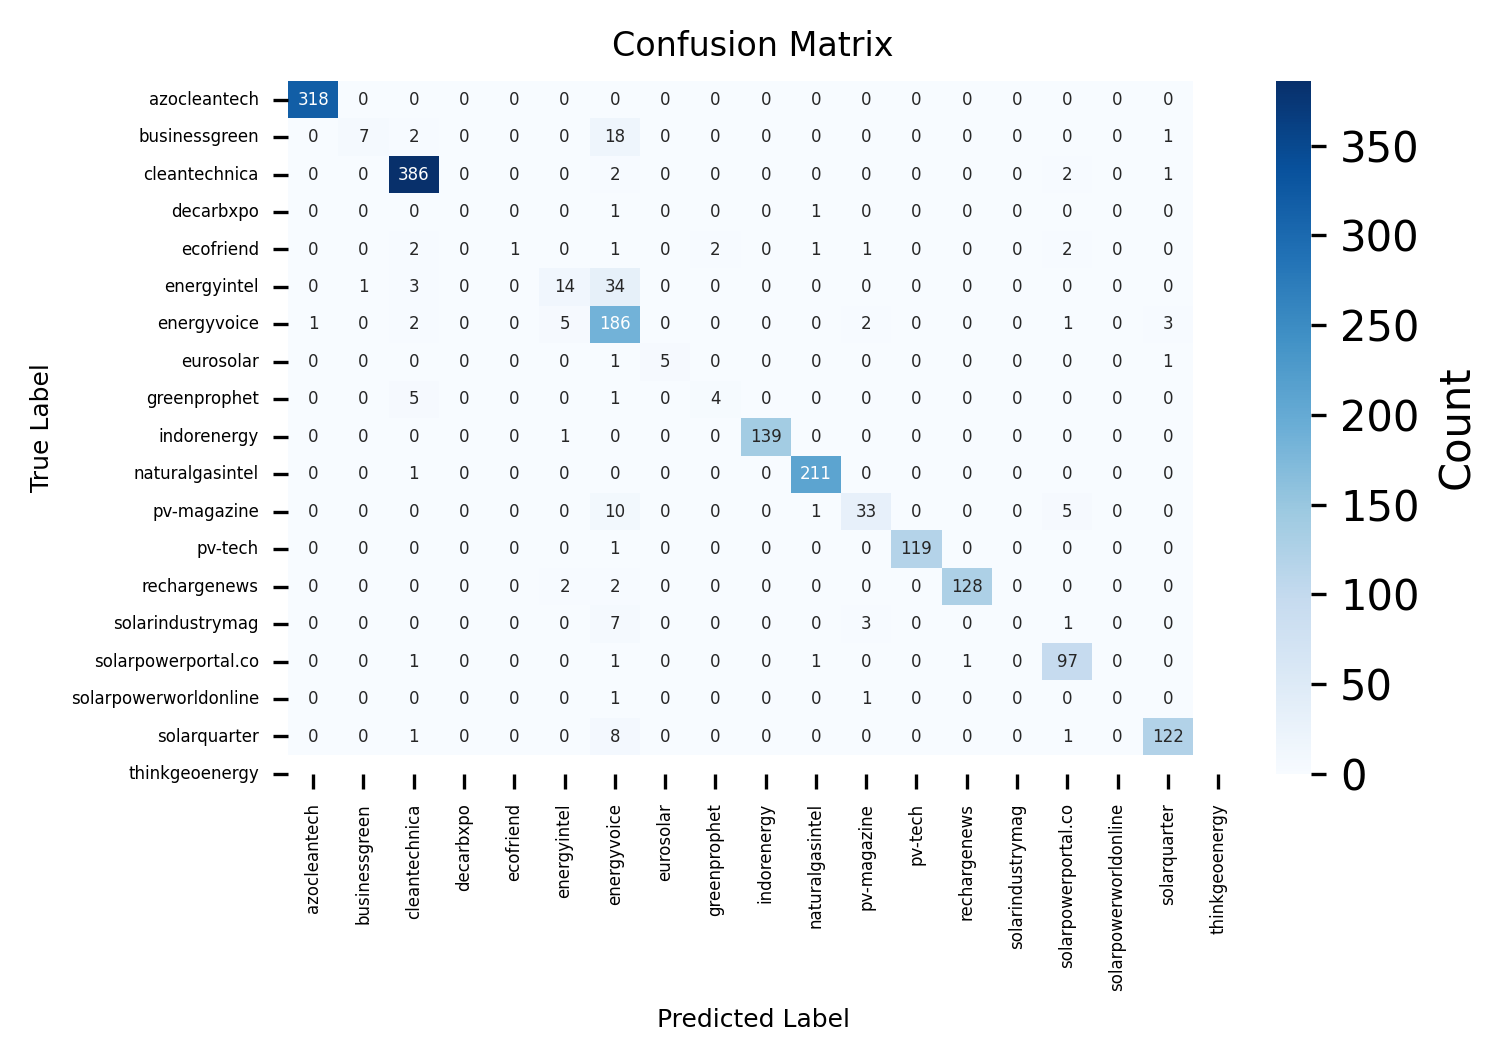

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(5, 3))  # Set the size of the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_,
            yticklabels=classifier.classes_, annot_kws={"size": 4}, cbar_kws={'label': 'Count'})
plt.xticks(fontsize=4)  # Set the x-axis tick label font size
plt.yticks(fontsize=4)  # Set the y-axis tick label font size
plt.title('Confusion Matrix', fontsize=8)  # Set the title font size
plt.xlabel('Predicted Label', fontsize=6)  # Set the x-axis label font size
plt.ylabel('True Label', fontsize=6)  # Set the y-axis label font size
plt.show()


In [ ]:
# Evaluate word similarity
word_pairs = [("qatar", "emissions"), ("india", "launches"), ("new", "chapter"),
              ("energy", "solar"), ("terrorism", "love"), ("government", "law")]

# Loop through word pairs and calculate similarity scores
for pair in word_pairs:
    try:
        # Attempt to calculate the similarity score using the word vectors from the model
        similarity_score = model.wv.similarity(pair[0], pair[1])
        print(f"Similarity between '{pair[0]}' and '{pair[1]}': {similarity_score}")
    except KeyError as e:
        # Handle the case where one or more words are not in the vocabulary
        print(f"One or more words not in vocabulary: {e}")

# Create an analogy
# Analogies are often of the form A:B :: C:D
# For example: "man:woman :: king:queen"
analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Analogy: king - man + woman = {analogy[0][0]}")


Similarity between 'qatar' and 'emissions': 0.6326406598091125
Similarity between 'india' and 'launches': 0.4357227683067322
Similarity between 'new' and 'chapter': 0.688277006149292
Similarity between 'energy' and 'solar': 0.7096428871154785
Similarity between 'terrorism' and 'love': 0.6295044422149658
Similarity between 'government' and 'law': 0.7847663760185242
Analogy: king - man + woman = Biking


**Similarity Scores:**

*'qatar' and 'emissions':* 0.6326 - Moderate similarity, indicating some association between "Qatar" and "emissions."

*'india' and 'launches':* 0.4357 - Lower similarity, suggesting less association between "India" and "launches."

*'new' and 'chapter':* 0.6883 - Moderate to high similarity, indicating a connection between "new" and "chapter."

*'energy' and 'solar':* 0.7096 - Relatively high similarity, suggesting a strong association between "energy" and "solar."

*'terrorism' and 'love':* 0.6295 - Moderate similarity, indicating some association between "terrorism" and "love" (although the words are not semantically related).

*'government' and 'law':* 0.7848 - High similarity, suggesting a strong association between "government" and "law."

**Analogy Result:**

The analogy "king - man + woman" results in the word "Biking." This is an unexpected result, and it's possible that the model may not capture certain nuances or that the trained word vectors are not perfect for all types of analogies.

In [ ]:
# Analogy pairs to evaluate
analogy_pairs = [("king", "man", "queen"), ("paris", "france", "berlin"), ("big", "bigger", "small")]

# Loop through analogy pairs and calculate results
for analogy in analogy_pairs:
    # Use the model to find the word that completes the analogy
    result = model.wv.most_similar(positive=[analogy[1], analogy[2]], negative=[analogy[0]], topn=1)

    # Print the analogy and the result
    print(f"Analogy: '{analogy[0]}' is to '{analogy[1]}' as '{analogy[2]}' is to '{result[0][0]}'")


Analogy: 'king' is to 'man' as 'queen' is to 'unseen'
Analogy: 'paris' is to 'france' as 'berlin' is to 'Oberlin'
Analogy: 'big' is to 'bigger' as 'small' is to 'small-'


*'king' is to 'man' as 'queen' is to 'unseen':*

The model completes the analogy with 'unseen,' which seems incorrect. In a typical gender analogy, 'king' is to 'man' as 'queen' is to 'woman.' The unexpected result may indicate a limitation or bias in the model's representation.


'paris' is to 'france' as 'berlin' is to 'Oberlin': *italicized text*

The model completes the analogy with 'Oberlin,' which is likely an error. A correct completion would be 'Germany.' This discrepancy could be due to the model's training data or specific characteristics of the word embeddings.

*'big' is to 'bigger' as 'small' is to 'small-':*

The model completes the analogy with 'small-,' which might be an indication of the model's inability to generalize the concept of "smaller" for the word 'small.' It's also possible that the training data does not adequately capture the intended relationship.

These results highlight potential limitations or biases in the learned word representations. It's essential to critically evaluate the model's performance in different analogy scenarios and consider the context and characteristics of the training data. Adjustments to the model or training data might be necessary to improve the quality of the learned embeddings.

In [ ]:
# Example: Word Intrusion Detection
words = ["apple", "banana", "orange", "carrot", "elephant"]
intrusion_word = "yellow"

# Use the model to detect the intrusion word that does not fit the pattern of the given words
intrusion_score = model.wv.doesnt_match(words + [intrusion_word])

# Print the detected intrusion word
print(f"The intrusion word is: {intrusion_score}")


The intrusion word is: banana


This code demonstrates word intrusion detection using the FastText model. The doesnt_match function is applied to a list of words along with an intrusion word, and it detects the word that deviates the most from the expected pattern. The comment provides a brief explanation of the purpose of the code, including the use of the doesnt_match function for word intrusion detection.

## Visualization of Embeddings

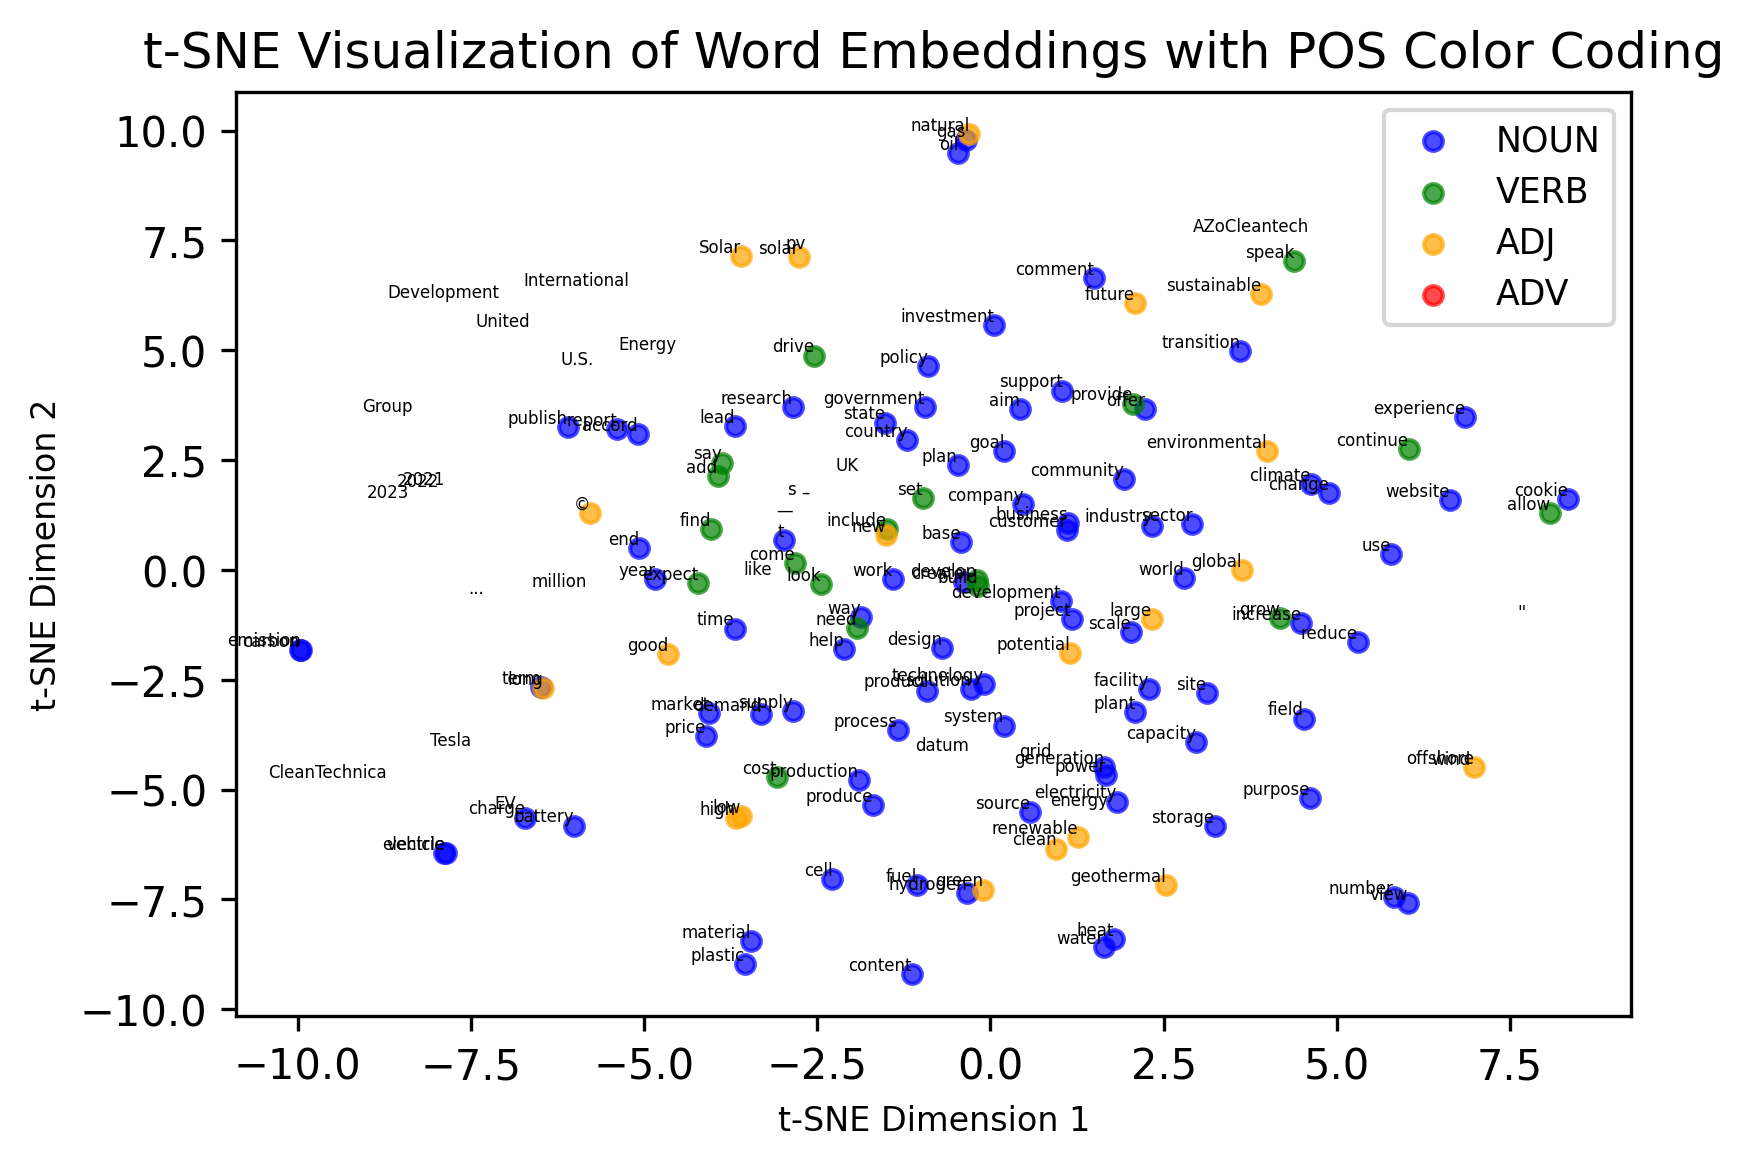

In [ ]:
# Extract word vectors and corresponding words
words = list(model.wv.index_to_key)[:150]  # Taking a reasonable amount of words for visualization
vectors = np.array([model.wv[word] for word in words])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Add color coding based on part-of-speech (POS)
pos_colors = {'NOUN': 'blue', 'VERB': 'green', 'ADJ': 'orange', 'ADV': 'red'}
pos_tags = [token.pos_ for token in nlp(' '.join(words))]  # Assuming you have spacy installed and 'nlp' is your spacy model

# Plot the word embeddings with color coding
plt.figure(figsize=(6,4))  # Adjust the figure size here
for pos, color in pos_colors.items():
    mask = [tag == pos for tag in pos_tags]
    plt.scatter(vectors_2d[mask, 0], vectors_2d[mask, 1], c=color, label=pos, s=20, alpha=0.7)

# Annotate some words for better interpretation with smaller text
for i, word in enumerate(words):
    plt.text(vectors_2d[i, 0], vectors_2d[i, 1], word, ha='right', va='bottom', fontsize=4)  # Adjust the fontsize here

# Add legend
plt.legend(fontsize='small')

# Set plot title and labels
plt.title('t-SNE Visualization of Word Embeddings with POS Color Coding')
plt.xlabel('t-SNE Dimension 1', fontsize=8)
plt.ylabel('t-SNE Dimension 2', fontsize=8)

plt.show()

## Model Tuning

In [ ]:
model_tuned = FastText(
    sentences=train_sentences,
    vector_size=150,  # Adjusted vector size
    window=8,         # Adjusted window size
    min_count=5,      # Adjusted minimum word count
    workers=6,        # Adjusted number of workers
    sg=3              # Skip-gram model
)

**vector_size=150:**

This parameter sets the dimensionality of the word vectors. Increasing vector size allows the model to capture more complex relationships between words but also increases the computational requirements.

**window=8:**

The window parameter defines the maximum distance between the current and predicted word within a sentence. A larger window size allows the model to consider more contextual information during training.

**min_count=5:**

This parameter sets the minimum number of occurrences for a word to be considered during training. Words with fewer occurrences than the specified threshold are ignored. Setting a higher value can help filter out rare and potentially noisy words.

**workers=6:**

The workers parameter controls the number of CPU threads used during training. Increasing the number of workers speeds up training by parallelizing computations across multiple threads, which can be beneficial for large datasets.

**sg=3:**

The sg parameter specifies the training algorithm. A value of 1 corresponds to the Skip-gram model, while a value of 0 corresponds to the Continuous Bag of Words (CBOW) model. In this case, sg=3 is not a standard value, and its interpretation depends on the specific implementation details of the FastText library.

In [ ]:
# Function to infer vectors for sentences using the tuned FastText model
def infer_vectors(sentences, model_tuned):
    vectors = []
    for sentence in sentences:
        # Average the word vectors for each sentence
        vectors.append(np.mean([model_tuned.wv[word] for word in sentence], axis=0))
    return vectors

# Infer vectors for training sentences using the tuned model
train_vectors = infer_vectors(train_sentences, model_tuned)

# Infer vectors for testing sentences using the tuned model
test_vectors = infer_vectors(test_sentences, model_tuned)

# Convert the lists of vectors to NumPy arrays
train_vectors = np.array(train_vectors)
test_vectors = np.array(test_vectors)


In [ ]:
# Extract labels from the training and testing datasets
train_labels = train_data['domain']
test_labels = test_data['domain']

# Initialize a logistic regression classifier with an increased max_iter
classifier = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier using the training vectors and labels
classifier.fit(train_vectors, train_labels)

# Make predictions on the test set using the trained classifier
predictions = classifier.predict(test_vectors)

# Evaluate the model accuracy on the test set
accuracy = accuracy_score(test_labels, predictions)

# Print the accuracy of the trained classifier
print(f'Accuracy: {accuracy}')


Accuracy: 0.9280125195618153


Sligthtly better model


The tuned model has a slightly higher accuracy (0.9280) compared to the not-tuned model (0.9233). The print statements will indicate that the tuned model performs better than the not-tuned model. The small improvement in accuracy suggests that the tuning of model parameters has had a positive impact on the model's performance.

In [ ]:
# Example: Word Intrusion Detection with the tuned FastText model
words = ["apple", "banana", "orange", "carrot", "elephant"]
intrusion_word = "yellow"

# Use the tuned model to detect the intrusion word that does not fit the pattern of the given words
intrusion_score = model_tuned.wv.doesnt_match(words + [intrusion_word])

# Print the detected intrusion word
print(f"The intrusion word is: {intrusion_score}")


The intrusion word is: banana


Still not that effective

This type of word intrusion detection can be useful in evaluating the semantic coherence of word embeddings. The detected intrusion word is expected to be the one that is least semantically related to the other words in the set. In this example, the result may indicate whether "yellow" is perceived as an intrusion in the semantic space defined by the tuned FastText model and the given set of words.

In [ ]:
# Analogy pairs to evaluate with the tuned FastText model
analogy_pairs = [("king", "man", "queen"), ("paris", "france", "berlin"), ("big", "bigger", "small")]

# Loop through analogy pairs and calculate results
for analogy in analogy_pairs:
    # Use the tuned model to find the word that completes the analogy
    result = model_tuned.wv.most_similar(positive=[analogy[1], analogy[2]], negative=[analogy[0]], topn=1)

    # Print the analogy and the result
    print(f"Analogy: '{analogy[0]}' is to '{analogy[1]}' as '{analogy[2]}' is to '{result[0][0]}'")


Analogy: 'king' is to 'man' as 'queen' is to 'homicide'
Analogy: 'paris' is to 'france' as 'berlin' is to 'Oberlin'
Analogy: 'big' is to 'bigger' as 'small' is to 'small-'


*'king' is to 'man' as 'queen' is to 'homicide':*

The model completes the analogy with 'homicide,' which is an unexpected result. In a typical gender analogy, 'king' is to 'man' as 'queen' is to 'woman.' The unexpected result may indicate a limitation or bias in the model's representation.

*'paris' is to 'france' as 'berlin' is to 'Oberlin':*

The model completes the analogy with 'Oberlin,' which is likely an error. A correct completion would be 'Germany' to maintain the country-city relationship. This discrepancy could be due to the model's training data or specific characteristics of the word embeddings.

*'big' is to 'bigger' as 'small' is to 'small-':*

The model completes the analogy with 'small-,' which might indicate a difficulty in generalizing the concept of "smaller" for the word 'small.' It's also possible that the training data does not adequately capture the intended relationship.

These results highlight potential limitations or biases in the learned word representations. Analogies are a common way to evaluate the semantic coherence of word embeddings, but they are not always perfect indicators of the model's performance.

# Bert Pre-trained Model

In [5]:
import pandas as pd
from pathlib import Path

In [6]:
#Read csv file
file_path = Path("/cleantech_media_dataset_v1_20231109.csv")

df = pd.read_csv(file_path)

In [ ]:
# Instantiate a BERT tokenizer and model from the pre-trained 'bert-base-uncased' configuration
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [7]:
# Getting first rows
df.head()

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


In [ ]:
# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-uncased')

.gitattributes:   0%|          | 0.00/491 [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)kage/Data/com.apple.CoreML/model.mlmodel:   0%|          | 0.00/165k [00:00<?, ?B/s]

weight.bin:   0%|          | 0.00/532M [00:00<?, ?B/s]

(…)sk/float32_model.mlpackage/Manifest.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/532M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Load spaCy English tokenizer
nlp = spacy.load('en_core_web_sm')

# Assuming 'df' is your DataFrame
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and preprocess text using spaCy
train_data['tokenized_content'] = train_data['content'].apply(lambda x: ' '.join([token.text for token in nlp(x)]))
test_data['tokenized_content'] = test_data['content'].apply(lambda x: ' '.join([token.text for token in nlp(x)]))

In [ ]:
# Encode and pool embeddings for training data
train_text = train_data['content'].tolist()
train_embeddings = model.encode(train_text)

In [ ]:
# Encode and pool embeddings for test data
test_text = test_data['content'].tolist()
test_embeddings = model.encode(test_text)

In [ ]:
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter value


# Train Logistic Regression
classifier = LogisticRegression()
classifier.fit(train_embeddings, train_data['domain'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
predictions = classifier.predict(test_embeddings)

## Model Evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_data['domain'], predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.896462018730489


Slightly less than the score we got with customized FastText.

In summary, an accuracy of 0.8965 is a positive indication, suggesting that the model is performing reasonably well on the classification task.

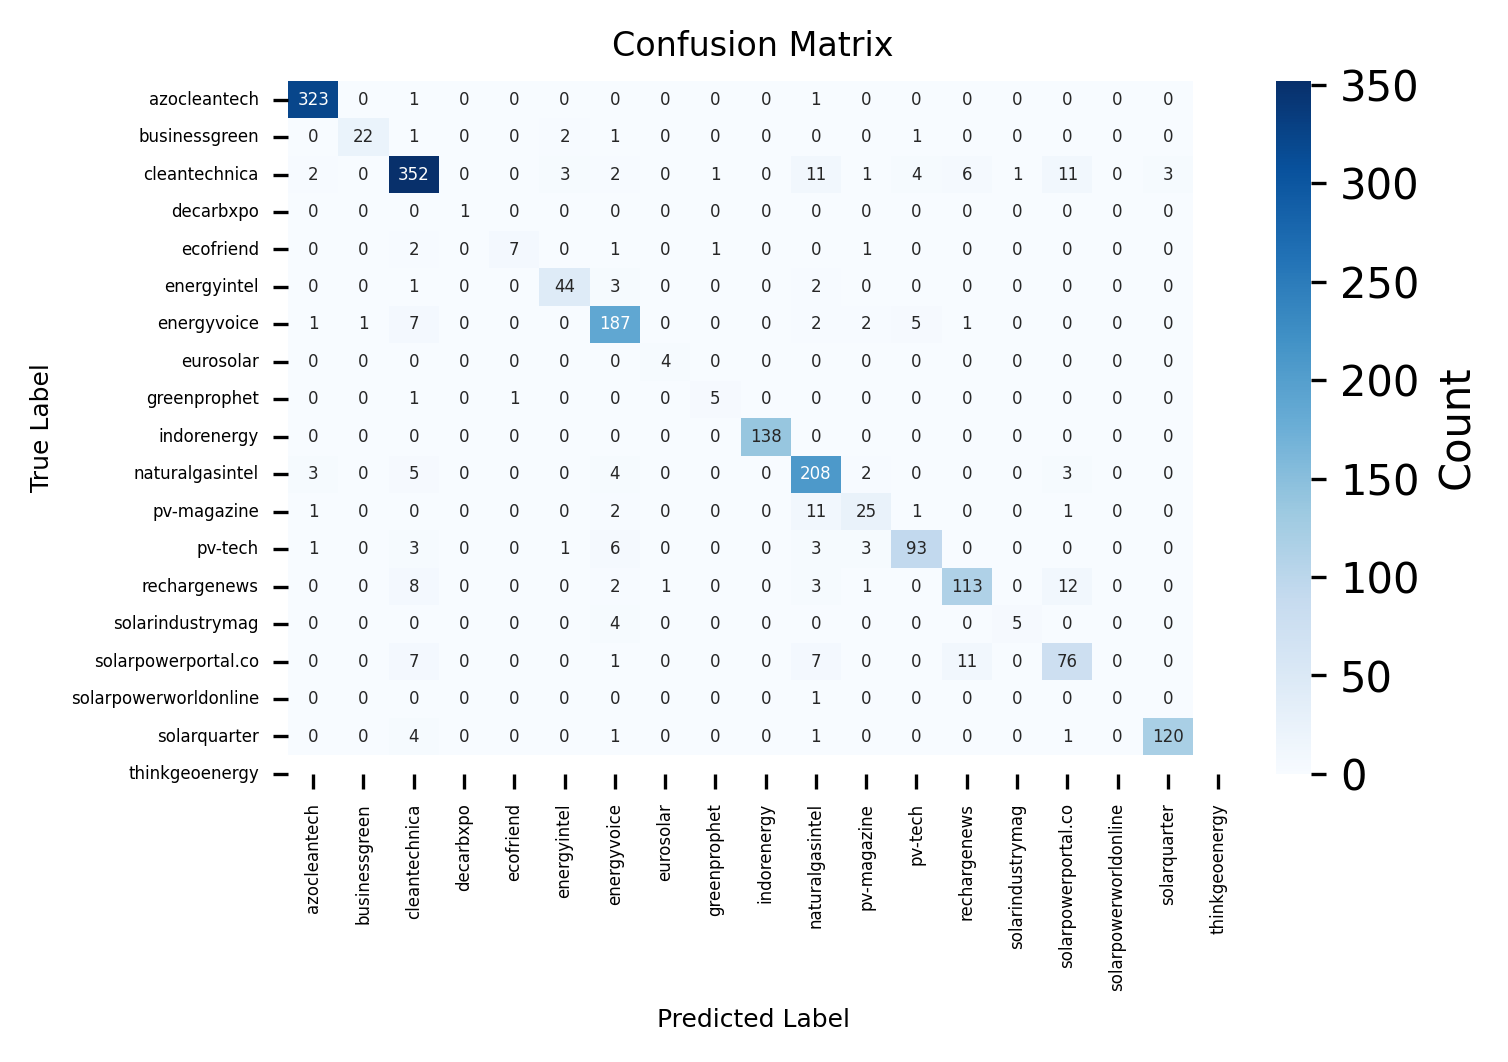

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_data['domain'], predictions)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(5, 3))  # Adjust the size here
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_,
            yticklabels=classifier.classes_, annot_kws={"size": 4}, cbar_kws={'label': 'Count'})
plt.xticks(fontsize=4)  # Adjust the x-axis tick label font size here
plt.yticks(fontsize=4)  # Adjust the y-axis tick label font size here
plt.title('Confusion Matrix', fontsize=8)  # Adjust the title font size here
plt.xlabel('Predicted Label', fontsize=6)  # Adjust the x-axis label font size here
plt.ylabel('True Label', fontsize=6)  # Adjust the y-axis label font size here
plt.show()


When we compare the customized FastText and Bert pretrained model we see pretrained model is slightly better to predict some specific classes. Hovwever, in genereal FastText model has more accuracy.

In [ ]:
6# Example: Word Intrusion Detection
words = ["apple", "banana", "orange", "carrot", "elephant", "yellow"]

# Encode the words using the BERT model
word_embeddings = model.encode(words)

# Calculate cosine similarity between word embeddings
cosine_similarities = cosine_similarity(word_embeddings)

# Find the word with the lowest average similarity
intrusion_word_index = np.argmin(np.mean(cosine_similarities, axis=0))
intrusion_word = words[intrusion_word_index]

print(f"The intrusion word is: {intrusion_word}")

The intrusion word is: carrot


Normally, we are expecting "elephant" has different semantic meaning.